<a href="https://colab.research.google.com/github/lazypnkj/AIML-projects/blob/main/Sentiment_analysis_using_DistilBertForSequenceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/reviews_reviews_com.ixigo_202304.csv', encoding = '')
data.head()

,Date,Star Rating,Review Text
0,7-Apr,5,Best app 👍
1,7-Apr,5,NaN
2,7-Apr,1,NaN
3,7-Apr,5,NaN
4,7-Apr,5,NaN


In [2]:
data['Review Text'].value_counts()

Good                                                                                15
Excellent                                                                            4
Very good                                                                            2
Great                                                                                2
Nice                                                                                 2
                                                                                    ..
Very costly flights                                                                  1
👌                                                                                    1
Easy to use and good offers                                                          1
Provides cheap & best flight railway ticket, lot of coupon will reduce your fair     1
No response so I am not satisfied your services.                                     1
Name: Review Text, Length: 89, dtype: int64

In [3]:
data.dtypes

Date           object
Star Rating     int64
Review Text    object
dtype: object

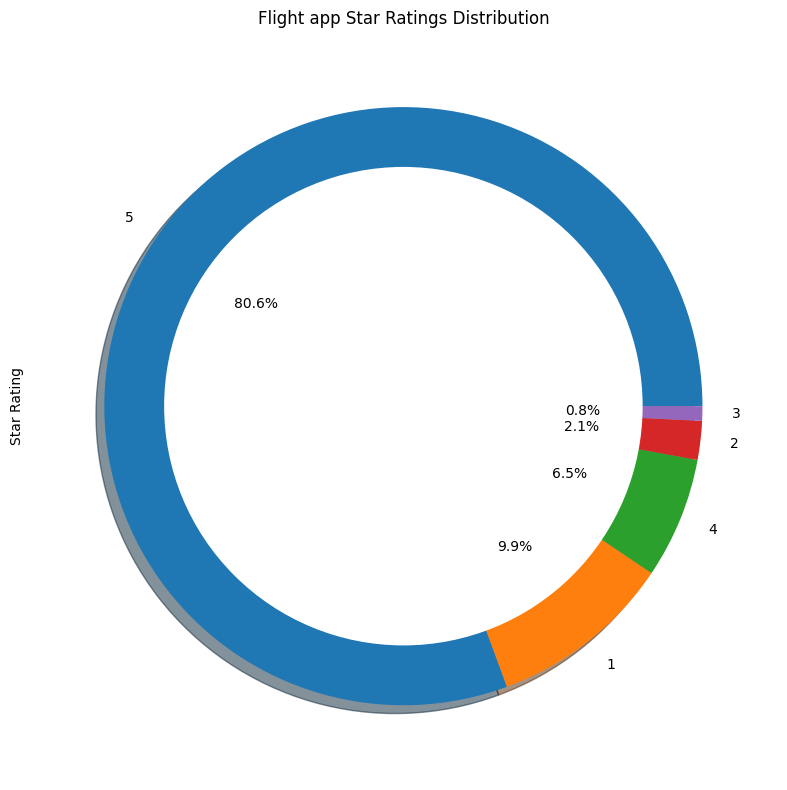

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

data['Star Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Flight app Star Ratings Distribution')
plt.savefig('flightapp ratings_distribution.png')
plt.tight_layout()
plt.show()


In [5]:
data.columns

Index(['Date', 'Star Rating', 'Review Text'], dtype='object')

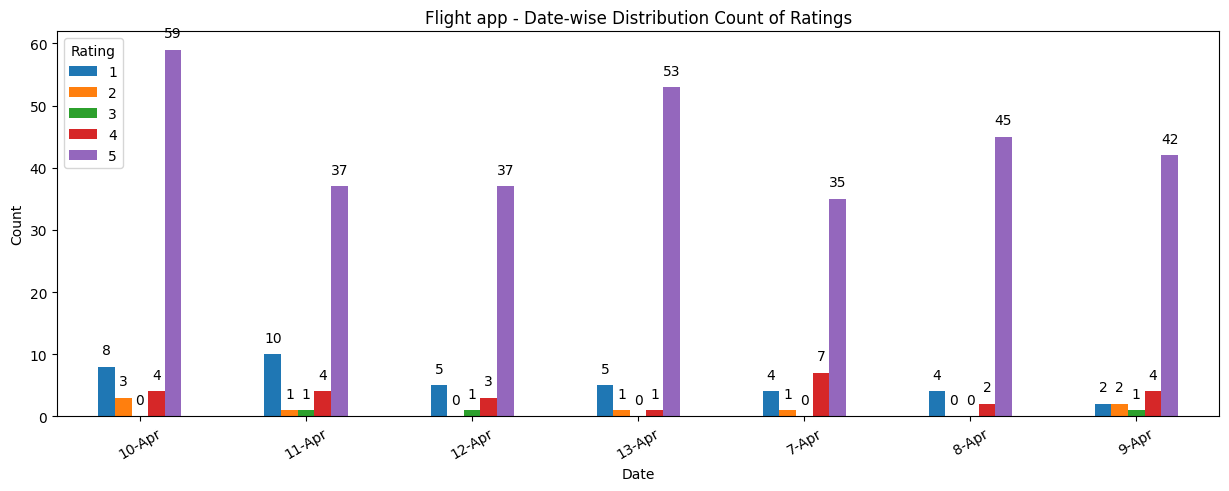

In [7]:

grouped_data = data.groupby(['Date', 'Star Rating']).size().unstack()

ax = grouped_data.plot(kind='bar', stacked=False, figsize=(15, 5))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Flight app - Date-wise Distribution Count of Ratings')
plt.legend(title='Rating')
plt.xticks(rotation=30)

label_offset = 2
for container in ax.containers:
    for rect in container.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x() + width / 2
        y = height + label_offset
        ax.annotate(f"{int(height)}", (x, y), ha='center', va='baseline')

plt.savefig('flightappdatewise_distribution.png')
plt.show()

In [8]:
data.dropna(inplace = True)
data.head()

,Date,Star Rating,Review Text
0,7-Apr,5,Best app 👍
5,7-Apr,5,Ol
11,7-Apr,5,Excellent Tickets are available at a very low ...
19,7-Apr,1,Money cut but flight not booked.
20,7-Apr,2,Experience not good and hidden charges


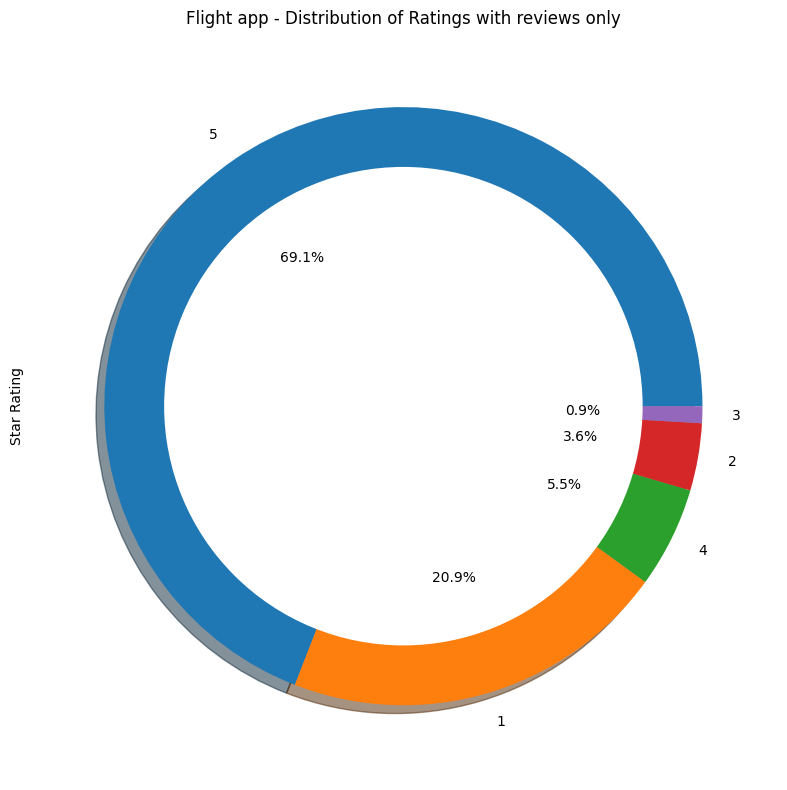

In [10]:
plt.figure(figsize=(8,8))

data['Star Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow = True)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Flight app - Distribution of Ratings with reviews only')
plt.savefig('flightappratings with review_distribution.png')
plt.tight_layout()
plt.show()


In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.3 MB/s eta 0:00:00


In [12]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

reviews = data['Review Text'].tolist()

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

sentiment_df = pd.DataFrame(columns=['Review', 'Sentiment', 'Sentiment_Score'])

for review in reviews:
    inputs = tokenizer(review, return_tensors='pt')

    outputs = model(**inputs)
    predictions = outputs.logits.softmax(dim=-1)


    sentiment_label = 'positive' if predictions.argmax().item() == 1 else 'negative'
    sentiment_score = predictions.max().item()

    sentiment_df = sentiment_df.append({'Review': review, 'Sentiment': sentiment_label, 'Sentiment_Score': sentiment_score}, ignore_index=True)

print(sentiment_df)

<ipython-input-12-c75afca1b524>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({'Review': review, 'Sentiment': sentiment_label, 'Sentiment_Score': sentiment_score}, ignore_index=True)
<ipython-input-12-c75afca1b524>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({'Review': review, 'Sentiment': sentiment_label, 'Sentiment_Score': sentiment_score}, ignore_index=True)
<ipython-input-12-c75afca1b524>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({'Review': review, 'Sentiment': sentiment_label, 'Sentiment_Score': sentiment_score}, ignore_index=True)
<ipython-input-12-c75afca1b524>:24: FutureWarning: The frame.append

                                                Review Sentiment  \
0                                           Best app 👍  positive   
1                                                   Ol  positive   
2    Excellent Tickets are available at a very low ...  positive   
3                     Money cut but flight not booked.  negative   
4               Experience not good and hidden charges  negative   
..                                                 ...       ...   
105                              Quite easy Interphase  positive   
106  Fraud service. Didn't refund the amount for th...  negative   
107                                          Excellent  positive   
108                                    Good discounted  positive   
109   No response so I am not satisfied your services.  negative   

     Sentiment_Score  
0           0.999170  
1           0.986560  
2           0.971215  
3           0.980917  
4           0.999381  
..               ...  
105         0.994906  

<ipython-input-12-c75afca1b524>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({'Review': review, 'Sentiment': sentiment_label, 'Sentiment_Score': sentiment_score}, ignore_index=True)


In [13]:
sentiment_df.head()

,Review,Sentiment,Sentiment_Score
0,Best app 👍,positive,0.999170
1,Ol,positive,0.986560
2,Excellent Tickets are available at a very low ...,positive,0.971215
3,Money cut but flight not booked.,negative,0.980917
4,Experience not good and hidden charges,negative,0.999381


<Figure size 1000x800 with 0 Axes>

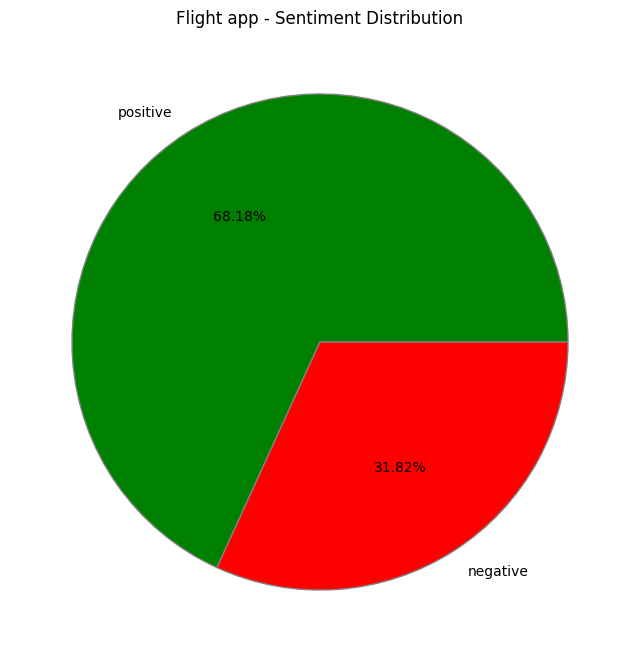

In [15]:
plt.figure(figsize=(10,8))
sentiment_counts = sentiment_df['Sentiment'].value_counts()
plt.figure(figsize=(8,10))

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', colors=['green', 'red'], wedgeprops={'edgecolor': 'gray'})
plt.title('Flight app - Sentiment Distribution')
plt.gca().add_artist(plt.Circle((0,0),0.0,fc='white'))
plt.savefig('flightappSentiment_distribution_donut_chart.png')
plt.show()